# Fitting Linear Mixed-Effects Models in [Julia](http://julialang.org)

## Definition of the model

$$
    \def\mc#1{{\mathcal{#1}}}
    \def\bm#1{{\bf #1}}
    \def\bth{{\bf\theta}}
    \def\bLt{{\bf\Lambda_{\bf\theta}}}
    \def\trans{^\prime}
$$
A linear mixed-effects model is characterized by the distribution of
two vector-valued random variables: the $n$-dimensional response, $\mc Y$,
and the $q$-dimensional random effects vector, $\mc B$.
The unconditional distribution of $\mc B$ is multivariate normal,
$$
    \mc B\sim \mc N(\bm 0,\bm\Sigma_{\bm\theta}),
$$
as is the conditional distribution of $\mc Y$ given $\mc B=\bm b$,
$$
    (\mc Y|\mc B=\bm b)\sim \mc N(\bm X\bm\beta+\bm Z\bm b, \sigma^2\bm I),
$$

In the [MixedModels](https://github.com/dmbates/MixedModels) package we represent
the covariance matrix in the unconditional distribution of $\mc B$ as
$$
    \bm\Sigma_{\bm\theta}=\sigma^2\bLt\bLt\trans,
$$
where $\bLt$ is the $q\times q$ _relative covariance factor_.
We also represent the random variable $\mc B$ as
$$
    \mc B=\bLt\mc U
$$
where $\mc U$ has a _spherical_ multivariate normal distribution,
$$
    \mc U\sim\mc N(\bm 0,\sigma^2\bm I).
$$
This allows us to express the _linear predictor_,
$$
    \bm\mu_{\mc Y|\mc B=\bm b}=\bm X\bm\beta+\bm Z\bm b=\bm X\bm\beta+\bm Z\bLt\bm u,
$$
as a function of $\bm\beta$ and $\bm u$.

For given values of $\bm\theta$ and $\bm\beta$ we solve a penalized linear
least squares problem of the form
$$
    r^2_{\bth}=\min_{\bm\beta,\bm u}\|\bm y-\bm X\bm\beta-\bm Z\bLt\bm u\|^2 + \|\bm u\|^2
$$
for which we compute the _sparse Cholesky factorization_,
$$
    \bm L_\bth\bm L_\bth=\bLt\trans\bm Z\trans \bm Z\bLt + \bm I ,
$$
where $\bm L_\bth$ is a sparse lower-triangular matrix.

Because $\bm L_\bth$ is triangular, we can easily evaluate its determinant
as the product of its diagonal elements.
By construction these diagonal elements are positive and the log-determinant, 
$\log(|\bLt\trans\bm Z\trans Z\bLt+\bm I|)=2\log(|\bm L_\bth|)$ is easily
evaluated.

The _profiled_ log-likelihood for a linear mixed-effects model, 
$\ell(\bm\theta|\bm y)$, can be expressed as
$$
    -2\ell(\bm\theta|\bm y) = \log(|\bLt\trans\bm Z\trans\bm Z\bLt+\bm I|)     +n\left[1+\log\left(\frac{2\pi r^2_\bth}{n}\right)\right].
$$
Minimizing this expression with respect to $\bth$ provides us with the 
_maximum likelihood estimates_, $\widehat{\bth}$, from which we obtain
$$
   \widehat{\sigma^2}=r^2_{\widehat\bth}/n.
$$
The minimizers of the penalized least squares problem at $\widehat\bth$
are $\widehat{\bm\beta}$ and the _conditional mean_, $\tilde{\bm u}$, of $\mc U$.

## Expressing the model

The `lmm` function for fitting linear mixed-effects models uses the formula/data
formulation that is familiar to [`R`](http://www.r-project.org) users.
The data argument should be a `DataFrame` as defined in the
[DataFrames](https://github.com/JuliaStats/DataFrames.jl) package.
Several examples of DataFrames are available in the
[RDatasets](https://github.com/johnmyleswhite/RDatasets.jl) package.

We use David Jones' [Gadfly](https://github.com/dcjones/Gadfly.jl) package in 
conjunction with [IJulia](https://github.com/JuliaLang/IJulia.jl) for graphics.

At present some of these packages produce warnings about ambiguous method definitions
when loaded.  To avoid having these warnings clutter the notebook we load them all now
and suppress the output from this chunk.

In [1]:
using DataFrames,Gadfly,MixedModels,RCall

Now the `DyeStuff` data from the [lme4](https://github.com/lme4/lme4)
package for `R` can be loaded and plotted as

In [2]:
@rimport lme4
ds = rcopy(lme4.Dyestuff)
dump(ds)

DataFrames.DataFrame  30 observations of 2 variables
  Batch: DataArrays.PooledDataArray{ASCIIString,UInt8,1}(30) ASCIIString["A","A","A","A"]
  Yield: DataArrays.DataArray{Float64,1}(30) [1545.0,1440.0,1440.0,1520.0]


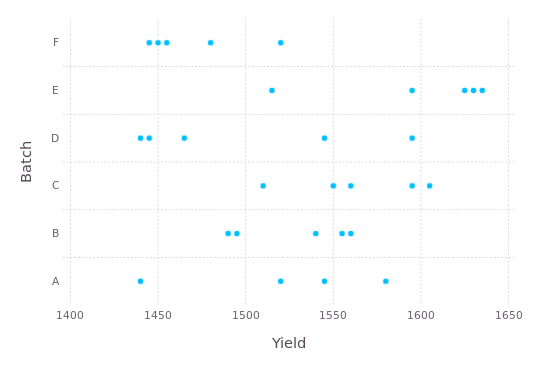

In [3]:
plot(ds, x="Yield", y = "Batch", Geom.point)

These data provide the yield of dyestuff in samples taken from different batches of
an intermediate product.

A mixed-model formula for `lmm` is similar to those used in `lme4`.

In [4]:
fm1 = fit!(lmm(Yield ~ 1 + (1|Batch), ds), true)

f_1: 327.76702, [1

Linear mixed model fit by maximum likelihood
 logLik: -163.663530, deviance: 327.327060, AIC: 333.327060, BIC: 337.530652

Variance components:
           Variance  Std.Dev. 
 Batch    1388.3332 37.260344
 Residual 2451.2500 49.510100
 Number of obs: 30; levels of grouping factors: 6

  Fixed-effects parameters:
             Estimate Std.Error z value
(Intercept)    1527.5   17.6946  86.326


.0]
f_2: 331.03619, [1.75]
f_3: 330.64583, [0.25]
f_4: 327.69511, [0.97619]
f_5: 327.56631, [0.928569]
f_6: 327.3826, [0.833327]
f_7: 327.35315, [0.807188]
f_8: 327.34663, [0.799688]
f_9: 327.341, [0.792188]
f_10: 327.33253, [0.777188]
f_11: 327.32733, [0.747188]
f_12: 327.32862, [0.739688]
f_13: 327.32706, [0.752777]
f_14: 327.32707, [0.753527]
f_15: 327.32706, [0.752584]
f_16: 327.32706, [0.752509]
f_17: 327.32706, [0.752591]
f_18: 327.32706, [0.752581]
FTOL_REACHED


By explicitly calling `fit!` on the model object and providing the optional second argument
as `true` we get verbose output giving the progress of the optimizer.

Common extractors from the object are:

In [5]:
show(fixef(fm1)) # estimated fixed-effects parameter vector, beta

[1527.4999999999998]

In [6]:
#ranef(fm1) # conditional means of B given Y and parameter estimates

In [7]:
#ranef(fm1,true) # conditional means on the U scale

In [8]:
sdest(fm1)  # estimated standard deviation of Y given B

49.51010023832522

For models with a single random-effects term the matrix $\Lambda$ is block diagonal with one block for each level of the random effects grouping factor.  For a single, scalar random effects term the diagonal blocks are repetitions of the $1\times1$ matrix

In [9]:
fm1.Λ

1-element Array{LowerTriangular{Float64,Array{Float64,2}},1}:
 [0.752581]

Note: in the Julia REPL (read-eval-print-loop) characters like $\lambda$ can be typed using the LaTeX code for the character (e.g. "\lambda") followed by the tab character.

In [10]:
cholfact(fm1)  # Fixed-effects part of the upper Cholesky factor

1x1 UpperTriangular{Float64,Array{Float64,2}}:
 2.79804

In [11]:
size(fm1) # no. of obs., fixed-effects parameters, random effects and terms

(30,1,6,1)

In [12]:
std(fm1)' # estimated standard deviations of variance components

1x2 Array{Any,2}:
 [37.2603]  [49.5101]

In [13]:
stderr(fm1) # standard errors of the fixed-effects parameter estimates

1-element Array{Float64,1}:
 17.6946

In [14]:
vcov(fm1) # estimated covariance matrix of the estimator of β

1x1 Array{Float64,2}:
 313.097

In [15]:
typeof(fm1)

MixedModels.LinearMixedModel{Float64}

In [16]:
cor(fm1) # estimated correlation matrices per term

1-element Array{Array{Float64,2},1}:
 [1.0]

## Vector-valued random effects

In some cases we define random effects for both slope and intercept with respect to
a covariate.
The `sleepstudy` data from the [lme4](https://github.org/lme4/lme4) package provide
measurements of reaction time (ms.) for several subjects in a sleep-deprivation
experiment.
The `Days` covariate is the number of days of sleep deprivation (subjects were allowed
only 3 hours for sleeping each night) before the measurement.

In [17]:
slp = rcopy(lme4.sleepstudy)
head(slp)

,Reaction,Days,Subject
1,249.56,0.0,308
2,258.7047,1.0,308
3,250.8006,2.0,308
4,321.4398,3.0,308
5,356.8519,4.0,308
6,414.6901,5.0,308


In [18]:
show(slp[:Subject].pool)  # levels of the Subject factor

ASCIIString["308","309","310","330","331","332","333","334","335","337","349","350","351","352","369","370","371","372"]

In [19]:
fm2 = fit!(lmm(Reaction ~ 1 + Days + (1 + Days|Subject), slp))

Linear mixed model fit by maximum likelihood
 logLik: -875.969672, deviance: 1751.939344, AIC: 1763.939344, BIC: 1783.097086

Variance components:
           Variance  Std.Dev.   Corr.
 Subject  565.51066 23.780468
           32.68212  5.716828  0.08
 Residual 654.94145 25.591824
 Number of obs: 180; levels of grouping factors: 18

  Fixed-effects parameters:
             Estimate Std.Error z value
(Intercept)   251.405   6.63226 37.9064
Days          10.4673   1.50224 6.96781


In [20]:
cor(fm2)  # estimated correlation matrix of the random effects

1-element Array{Array{Float64,2},1}:
 [1.0,0.0813322,0.0813322,1.0]

To fit a model constraining the correlation in the marginal distribution of the random effects to zero we use two random-effects terms.

In [21]:
fm3 = fit!(lmm(Reaction ~ 1 + Days + (1|Subject) + (0+Days|Subject), slp))

Linear mixed model fit by maximum likelihood
 logLik: -876.001628, deviance: 1752.003255, AIC: 1762.003255, BIC: 1777.968039

Variance components:
           Variance  Std.Dev. 
 Subject  584.258969 24.17145
 Subject   33.632805  5.79938
 Residual 653.115782 25.55613
 Number of obs: 180; levels of grouping factors: 18, 18

  Fixed-effects parameters:
             Estimate Std.Error z value
(Intercept)   251.405   6.70771   37.48
Days          10.4673   1.51931 6.88951


## Models with multiple random-effects terms

The `Pastes` and `Penicillin` data from the `lme4` package provide examples
of data classified according to two grouping factors.
In the case of `Pastes` the grouping factor `sample` is nested within `batch`.
In the case of `Penicillin` the grouping factors, `sample` and `plate`, are crossed.

In [22]:
psts = rcopy(lme4.Pastes)
head(psts)

,strength,batch,cask,sample
1,62.8,A,a,A:a
2,62.6,A,a,A:a
3,60.1,A,b,A:b
4,62.3,A,b,A:b
5,62.7,A,c,A:c
6,63.1,A,c,A:c


In [23]:
pen = rcopy(lme4.Penicillin)
head(pen)

,diameter,plate,sample
1,27.0,a,A
2,23.0,a,B
3,26.0,a,C
4,23.0,a,D
5,23.0,a,E
6,21.0,a,F


In [26]:
fm4 = fit!(lmm(strength ~ 1 + (1|sample) + (1|batch), psts))

Linear mixed model fit by maximum likelihood
 logLik: -123.997233, deviance: 247.994466, AIC: 255.994466, BIC: 264.371844

Variance components:
           Variance   Std.Dev.  
 sample   8.43361633 2.90406893
 batch    1.19918049 1.09507100
 Residual 0.67800207 0.82340881
 Number of obs: 60; levels of grouping factors: 30, 10

  Fixed-effects parameters:
             Estimate Std.Error z value
(Intercept)   60.0533  0.642136 93.5212


In [28]:
fm5 = fit!(lmm(diameter ~ 1 + (1|plate) + (1|sample),pen)j)

Linear mixed model fit by maximum likelihood
 logLik: -166.094174, deviance: 332.188349, AIC: 340.188349, BIC: 352.067602

Variance components:
           Variance   Std.Dev. 
 plate    0.71497948 0.8455646
 sample   3.13519356 1.7706478
 Residual 0.30242640 0.5499331
 Number of obs: 144; levels of grouping factors: 24, 6

  Fixed-effects parameters:
             Estimate Std.Error z value
(Intercept)   22.9722  0.744596 30.8519


## Larger examples

The computational methods in `lme4` and in `MixedModels` have been carefully tuned
to provide good performance on relatively large data sets.
The `InstEval` data set provides the evaluations by many students, `s`, on many instructors,
`d`, over a period of several years.

In [30]:
inst = rcopy(lme4.InstEval)
head(inst)

,s,d,studage,lectage,service,dept,y
1,1,1002,2,2,0,2,5
2,1,1050,2,1,1,6,2
3,1,1582,2,2,0,2,5
4,1,2050,2,2,1,3,3
5,2,115,2,1,0,5,2
6,2,756,2,1,0,5,4


In [32]:
@time fm5 = fit!(lmm(y ~ dept*service + (1|s) + (1|d), inst))

Linear mixed model fit by maximum likelihood
 logLik: -118792.776708, deviance: 237585.553415, AIC: 237647.553415, BIC: 237932.876339

Variance components:
            Variance   Std.Dev.  
 s        0.105417973 0.32468134
 d        0.258416365 0.50834670
 Residual 1.384727773 1.17674457
 Number of obs: 73421; levels of grouping factors: 2972, 1128

  Fixed-effects parameters:
                           Estimate Std.Error   z value
(Intercept)                 3.22961  0.064053   50.4209
dept - 5                   0.129536  0.101294   1.27882
dept - 10                 -0.176751 0.0881352  -2.00545
dept - 12                 0.0517102 0.0817523  0.632522
dept - 6                  0.0347319  0.085621  0.405647
dept - 7                    0.14594 0.0997984   1.46235
dept - 4                   0.151689 0.0816897   1.85689
dept - 8                   0.104206  0.118751  0.877517
dept - 9                  0.0440401 0.0962985  0.457329
dept - 14                 0.0517546 0.0986029  0.524879
dept

2.346750 seconds (20.11 M allocations: 451.304 MB, 4.49% gc time)


Another example provided by Martijn Weiling provides "pronounciation distance from standard Dutch"
on a large selection of words by subjects from different locales.

In [33]:
dialect = DataFrame(read_rda("/home/bates/Downloads/dialectNL.rda")["dialectNL"]);
names(dialect)

37-element Array{Symbol,1}:
 :Word                                 
 :Transcriber                          
 :Location                             
 :PronDistStdDutch                     
 :PronDistStdDutch_c                   
 :Longitude                            
 :Latitude                             
 :Geo                                  
 :WordFreq_log                         
 :WordFreq_log_z                       
 :WordCategory                         
 :WordIsNounOrAdverb                   
 :WordLength_log                       
 ⋮                                     
 :PopAvgAge_z                          
 :PopAvgAge_residPopAvgIncome_log_Geo  
 :PopAvgAge_residPopAvgIncome_log_Geo_z
 :PopMaleFemaleRatio                   
 :PopMaleFemaleRatio_z                 
 :SpeakerIsMale                        
 :SpeakerBirthYear                     
 :SpeakerBirthYear_z                   
 :SpeakerEmploymentLevel               
 :SpeakerRecordingYear                 
 :SpeakerRec

In [34]:
size(dialect)

(225866,37)

In [35]:
@time fm6 = fit!(lmm(PronDistStdDutch ~ Geo + (1|Word) + (1|Location) + (1|Transcriber),dialect))

Linear mixed model fit by maximum likelihood
 logLik: 12383.125235, deviance: -24766.250470, AIC: -24754.250470, BIC: -24692.284286

Variance components:
                Variance     Std.Dev.  
 Word        0.02399189000 0.154893157
 Location    0.00257663873 0.050760602
 Transcriber 0.00055714448 0.023603908
 Residual    0.05146584996 0.226860860
 Number of obs: 225866; levels of grouping factors: 559, 424, 30

  Fixed-effects parameters:
             Estimate  Std.Error  z value
(Intercept)  -4.09797 0.00879672 -465.852
Geo          0.979364  0.0287142  34.1074


1.432933 seconds (13.17 M allocations: 267.002 MB, 6.24% gc time)
